# Сборный проект №1

**Описание проекта**

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Данные предоставленны до 2016 года. Сейчас декабрь 2016 г., планируется кампания на 2017-й. Нужно отработать принцип работы с данными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**План выполнения проекта**

    1. Изучить данные из представленного датасета;
    2. Подготовить данные для исследования:
        2.1 Обработать названия столбцов;
        2.2 Заполнить пропуски;
        2.3 Привести данные к нужному типу данных;
        2.4 Проверить данные на дубликаты;
        2.5 Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец;
    3. Провести исследовательский анализ данных:
        3.1 Посмотреть, сколько игр выпускалось в разные года;
        3.2 Посмотреть, как менялись продажи по платформам;
        3.3 Выберать платформы с наибольшими суммарными продажами и построить распределение по годам;
        3.4 Выяснить: за какой характерный срок появляются новые и исчезают старые платформы;
        3.5 Выделить актуальный период на основе данных, полученных из предыдущих действий;
        3.6 Выяснить: какие платформы лидируют по продажам, растут или падают; 
        3.7 Выберать несколько потенциально прибыльных платформ;
        3.8 Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам, описать результат;
        3.9 Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков: построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажам, сформулировать выводы;
        3.10 Соотнести выводы с продажами игр на других платформах;
        3.11 Посмотреть на общее распределение игр по жанрам. 
        3.12 Определить самые прибыльные жанры;
        3.13 Выделяются ли жанры с высокими и низкими продажами;
    4. Составить портрет пользователя каждого региона:
        4.1 Определите для пользователя каждого региона 5 самых популярных платформ;
        4.2 Определите для пользователя каждого региона 5 самых популярных жанров;
        4.3 Выяснить: влияет ли рейтинг ESRB на продажи в отдельном регионе;
    5. Проверить гипотезы:
        5.1 Об одинаковости средних пользовательских рейтингов платформ Xbox One и PC;
        5.2 О разности средних пользовательских рейтингов жанров Action и Sports разные;

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

В данных 16715 строк и 11 столбцов: название игры, платформа выпуска игры, год релиза игры, жанр игры, число проданных копий в Северной Америке (млн.), число проданных копий в Европе (млн.), число проданных копий в Японии (млн.), число проданных копий в других регионах (млн.), оценка критиков, оценка игроков, рейтинг по ESRB.

В столбцах с именем игры и жанром игры по 2 пропуска, возможно они связаны. их можно будет удалить, т.к. вряд ли они повлияют на ход исследования. Пропуски скорее всего возникли из-за ошибки.

В столбцах с оценками критиков и игроков много пропусков. Заполнить их по какому-либо алгоритму не получится, так как каждая игра уникальна, следовательно каждая игра оценивается независимо ни от года выпуска, ни от платформы ни от жанра. Пропуски возникли наверняка из-за выгрузки оценок со стороннего сервиса, на котором не была указана оценка этих игр.

Столбец с рейтингом ESRB содержит много пропусков, так как эта система начала действовать только в 1996, следовательно, оценивать игры до 1996 года не могла. Вероятнее всего пропуски в этом столбце содержат игры, которые вышли до 1996 года. Заполнить пропуски так же не является возможным, т.к. каждая игра оценивается независимо ни от года выпуска, ни от платформы ни от жанра.

## Подготовка данных

### Приведение названий столбцов к snake_case

In [4]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
data = data.rename(str.lower, axis='columns')

In [6]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Назавания столбцов успешно приведено к 'snake_case'

### Заполнение пропусков

#### Заполнение пропусков в столбце годов релизов

In [7]:
print('Количество пропусков в столбце с годом релиза игр:', len(data[data['year_of_release'].isna()]))

Количество пропусков в столбце с годом релиза игр: 269


In [14]:
data = data.dropna(subset=['year_of_release'])
print('Количество пропусков в столбце с годом релиза игр:', len(data[data['year_of_release'].isna()]))

Количество пропусков в столбце с годом релиза игр: 0


Пропусков в столбце с датами релизов игр мало, поэтому резонно удалить их. Это слабо скажется на результатах исследования.

#### Заполнение пропусков в столбце с оценками критиков, оценками игроков и рейтингом ESRB

In [15]:
print('Количество пропусков в столбце с оценками критиков:', len(data[data['critic_score'].isna()]))
print('Доля пропусков в столбце с оценками критиков:', len(data[data['critic_score'].isna()])/len(data) * 100, '%')

Количество пропусков в столбце с оценками критиков: 8463
Доля пропусков в столбце с оценками критиков: 51.45932141554177 %


In [16]:
print('Количество пропусков в столбце с оценками игроков:', len(data[data['user_score'].isna()]))
print('Количество пропусков в столбце с оценками игроков:', len(data[data['user_score'].isna()])/len(data) * 100, '%')

Количество пропусков в столбце с оценками игроков: 6607
Количество пропусков в столбце с оценками игроков: 40.1739024686854 %


In [17]:
print('Количество пропусков в столбце с рейтингом ESRB:', len(data[data['rating'].isna()]))
print('Количество пропусков в столбце с рейтингом ESRB:', len(data[data['rating'].isna()])/len(data) * 100, '%')

Количество пропусков в столбце с рейтингом ESRB: 6678
Количество пропусков в столбце с рейтингом ESRB: 40.60561838744984 %


Пропусков в столбцах с оценками критиков, оценками игроков и рейтингом ESRB очень много. Но заполнить их средни по каким-либо значениям не предстовляется возможным, так как каждая игра оценивается независимо ни от каких параметров, представленных в таблице. Поэтому я заполню их особыми значениями, чтобы они были заметны в таблице.

##### Столбец с оценками критиков

In [18]:
data['critic_score'] = data['critic_score'].fillna(-1)
print('Доля пропусков в столбце с оценками критиков:', len(data[data['critic_score'].isna()])/len(data) * 100, '%')

Доля пропусков в столбце с оценками критиков: 0.0 %


Пропуски в столбце с оценками от критиков были заполнены значением "-1".

##### Столбец с оценками игроков

In [19]:
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.5       2
1.9       2
0.5       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

В оценках игроков есть значение "tbd", которое означает, что игроки ещё пока оценивают игру. Это неявных пропуск, его тоже я заменю на специальное значение.

In [20]:
data['user_score'] = data['user_score'].replace('tbd', -1)
data['user_score'] = data['user_score'].fillna(-1)
print('Количество пропусков в столбце с оценками игроков:', len(data[data['user_score'].isna()])/len(data) * 100, '%')

Количество пропусков в столбце с оценками игроков: 0.0 %


Пропуски и значения "tbd" заменены на "-1".

##### Столбец с рейтингом ESRB

In [21]:
data['rating'] = data['rating'].fillna('?')
print('Количество пропусков в столбце с рейтингом ESRB:', len(data[data['rating'].isna()])/len(data) * 100, '%')

Количество пропусков в столбце с рейтингом ESRB: 0.0 %


Пропущеные значения были заменены на спец. символ "?".

### Удаление пропущенных значений столбцов с именем и жанром игр

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float64
 9   user_score       16446 non-null  object 
 10  rating           16446 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [23]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Пропуски успешно удалены.

### Округление значений в столобцах и приведение столбцов к необходимому типу данных

In [24]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['critic_score'] = data['critic_score'].astype('int')
data['user_score'] = pd.to_numeric(data['user_score'])
data['user_score'] = round(data['user_score'], 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Значения успешно округлены и приведены к необходимому типу данных.

### Обработка дубликатов

In [25]:
data.duplicated().sum()

0

Дубликатов в таблице нет.

### Подсчет суммарных продаж игр во всех регионах

In [26]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,?,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,?,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1.0,?,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1.0,?,28.31


Суммарные продажи игр во всех регионах успешно подсчитаны.

## Проведение исследователского анализа данных

### Количество игр, выпускавшиеся в разные года

In [28]:
print(data['year_of_release'].min())
print(data['year_of_release'].max())

1980
2016


Text(0, 0.5, 'Число проданных копий, млн.')

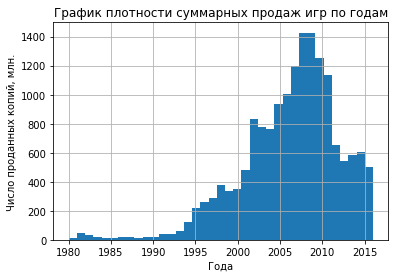

In [29]:
data['year_of_release'].hist(bins=37)
plt.title("График плотности суммарных продаж игр по годам")
plt.xlabel('Года')
plt.ylabel('Число проданных копий, млн.')

In [30]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


In [31]:
print('Число игр, выпускавшиеся в период с 1980 по 1984 года:', len(data.query('1979 < year_of_release < 1985')))
print('Число игр, выпускавшиеся в период с 1985 по 1989 года:', len(data.query('1984 < year_of_release < 1990')))
print('Число игр, выпускавшиеся в период с 1990 по 1994 года:', len(data.query('1989 < year_of_release < 1995')))
print('Число игр, выпускавшиеся в период с 1995 по 1999 года:', len(data.query('1994 < year_of_release < 2000')))
print('Число игр, выпускавшиеся в период с 2000 по 2004 года:', len(data.query('1999 < year_of_release < 2005')))
print('Число игр, выпускавшиеся в период с 2005 по 2009 года:', len(data.query('2004 < year_of_release < 2010')))
print('Число игр, выпускавшиеся в период с 2010 по 2014 года:', len(data.query('2009 < year_of_release < 2015')))
print('Число игр, выпускавшиеся в период с 2015 по 2019 года:', len(data.query('2014 < year_of_release < 2020')))

Число игр, выпускавшиеся в период с 1980 по 1984 года: 122
Число игр, выпускавшиеся в период с 1985 по 1989 года: 83
Число игр, выпускавшиеся в период с 1990 по 1994 года: 281
Число игр, выпускавшиеся в период с 1995 по 1999 года: 1488
Число игр, выпускавшиеся в период с 2000 по 2004 года: 3198
Число игр, выпускавшиеся в период с 2005 по 2009 года: 5995
Число игр, выпускавшиеся в период с 2010 по 2014 года: 4169
Число игр, выпускавшиеся в период с 2015 по 2019 года: 1108


Из гистограммы и таблицы отчетливо видно, что число продаваемых игр в период с 2005 по 2009 года заметно выше, чем в остальные периоды. Скорее всего это связано с большим количеством платформ, на которые выходили игры (например, "LEGO Batman: The Videogame" в 2008 году вышла сразу на 7 платформ).

,name
year_of_release,
1980,8
1981,43
1982,33
1983,16
1984,13
1985,13
1986,21
1987,15
1988,11


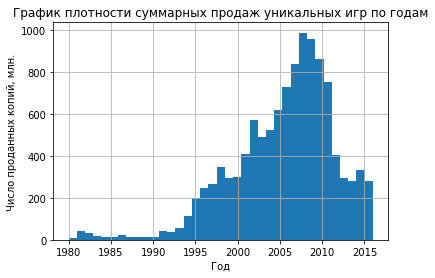

In [32]:
data_name_unique = data.drop_duplicates(subset=['name']).reset_index()
data_name_unique['year_of_release'].hist(bins=37)
plt.title("График плотности суммарных продаж уникальных игр по годам")
plt.xlabel('Год')
plt.ylabel('Число проданных копий, млн.')

data_name_unique.pivot_table(index='year_of_release', values='name', aggfunc='count')

Предположение о том, что пик гистограмма имеет подобный вид не прошла, в 2005-2009 года действительно выпускалось большее количество игр. Возможно число выпускаемых игр упало из-за повышения цены на разработку и усложнения разработки игр.

### Анализ изменения продаж по платформам

In [33]:
data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).head(5)

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


Судя по суммарным продажам 5 самых популярных платформ это PS2, X360, PS3, Wii, DS. Все они на момент анализа данных (декабрь 2016) явно являются неактуальными платформами, поэтому на их основе можно провести исследование средней продолжительности актуальности консоли.

Text(0, 0.5, 'Число проданных копий, млн.')

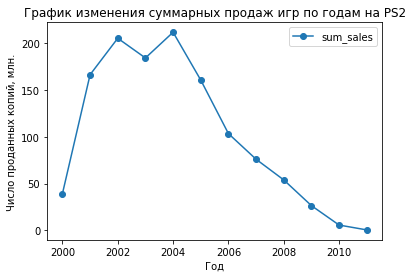

In [34]:
(data.query('platform == "PS2"')
 .pivot_table(index='year_of_release', 
              values='sum_sales', 
              aggfunc='sum')
 .plot(kind='line', style='o-'))
plt.title("График изменения суммарных продаж игр по годам на PS2")
plt.xlabel('Год')
plt.ylabel('Число проданных копий, млн.')

Text(0, 0.5, 'Число проданных копий, млн.')

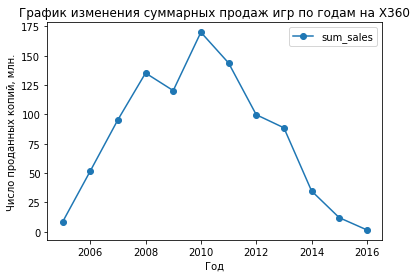

In [35]:
(data.query('platform == "X360"')
 .pivot_table(index='year_of_release', 
              values='sum_sales', 
              aggfunc='sum')
 .plot(kind='line', style='o-'))
plt.title("График изменения суммарных продаж игр по годам на X360")
plt.xlabel('Год')
plt.ylabel('Число проданных копий, млн.')

Text(0, 0.5, 'Число проданных копий, млн.')

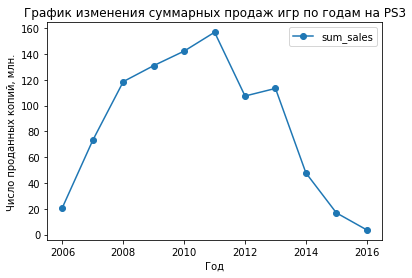

In [36]:
(data.query('platform == "PS3"')
 .pivot_table(index='year_of_release', 
              values='sum_sales', 
              aggfunc='sum')
 .plot(kind='line', style='o-'))
plt.title("График изменения суммарных продаж игр по годам на PS3")
plt.xlabel('Год')
plt.ylabel('Число проданных копий, млн.')

Text(0, 0.5, 'Число проданных копий, млн.')

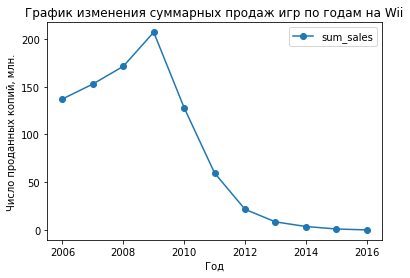

In [37]:
(data.query('platform == "Wii"')
 .pivot_table(index='year_of_release', 
              values='sum_sales', 
              aggfunc='sum')
 .plot(kind='line', style='o-'))
plt.title("График изменения суммарных продаж игр по годам на Wii")
plt.xlabel('Год')
plt.ylabel('Число проданных копий, млн.')

Text(0, 0.5, 'Число проданных копий, млн.')

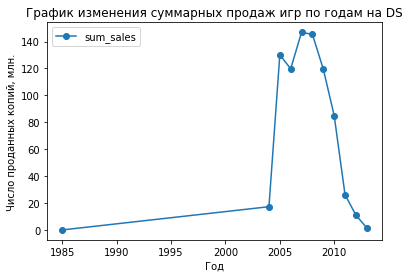

In [38]:
(data.query('platform == "DS"')
 .pivot_table(index='year_of_release', 
              values='sum_sales', 
              aggfunc='sum')
 .plot(kind='line', style='o-'))
plt.title("График изменения суммарных продаж игр по годам на DS")
plt.xlabel('Год')
plt.ylabel('Число проданных копий, млн.')

На графиках отчетливо видно, что средняя продолжительность актуальности платформы держится около 10 лет, и пик их популярности приходит через примерно 5 лет. Следовательно, чтобы выделить потенциально прибыльные платформы, необходимо взять те, что появились на рынке недавно и пик популярности которых ещё не прошёл. 

### Поиск актуальных платформ

In [39]:
data_actual = data.query('year_of_release > 2013')

Text(0, 0.5, 'Число проданных копий, млн.')

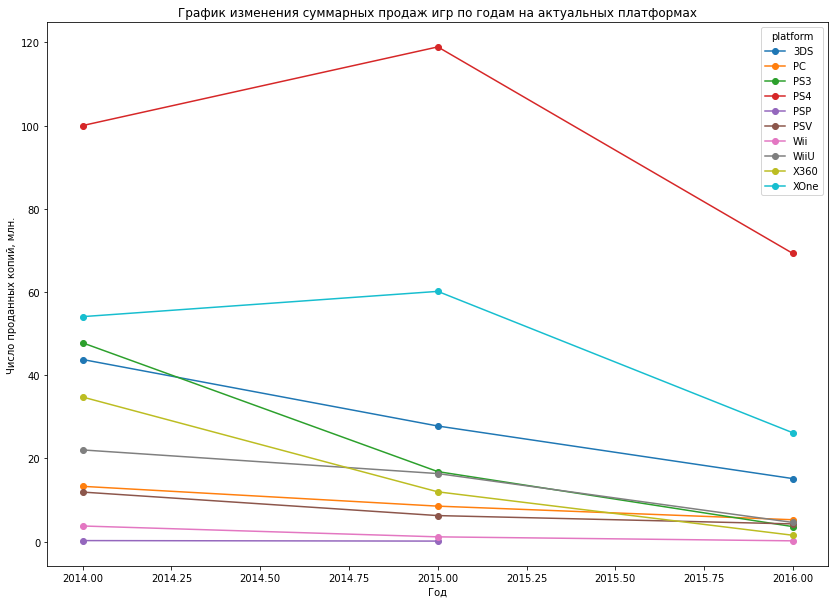

In [40]:
(data_actual.pivot_table(index='platform', 
                         columns='year_of_release', 
                         values='sum_sales', 
                         aggfunc='sum')
 .T
 .plot(kind='line', figsize=(14,10),  style = 'o-'))

plt.title("График изменения суммарных продаж игр по годам на актуальных платформах")
plt.xlabel('Год')
plt.ylabel('Число проданных копий, млн.')

Исходя из графиков, наиболее актуальными платформами являются PS4 и XOne. Они появились на рынке недавно и начинают завоёвывать популярность. В 2016 году продажи игр на XOne и PS4 сильно уменьшились, по сравнению с 2015 (почти в 2 раза на обоих платформах), но если судить по графикам продаж игр на платформах предыдущих поколений, то это не страшно, т.к. у всех платформ есть небольшие проседания перед годом с самыми высокими продажами игр.

Остальные же платформы с каждым годом теряют свою популярность в виду устаревания.

### Разброс продаж игр на актуальных платформах

<AxesSubplot:xlabel='platform', ylabel='sum_sales'>

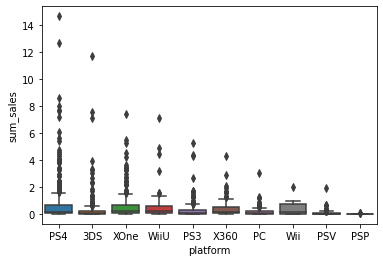

In [41]:
sns.boxplot(data=data_actual, x='platform', y='sum_sales')

(0.0, 1.75)

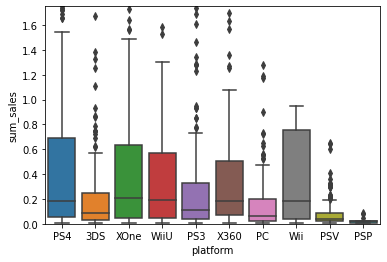

In [42]:
sns.boxplot(data=data_actual, x='platform', y='sum_sales')
plt.ylim(0, 1.75)

На графиках "ящик с усами" видно, в основная масса игр продаётся небольшими тиражами, но на PS4 больше игр, продающиеся невероятно большим тиражом, что говорит о том, что продажа игр на данную платформу быдет потенциально выгоднее, чем на остальных платформах. Медиана у XOne выше чем у остальных платформ, что говорит о том, что игры для неё продаются более стабильным числом.

### Зависимость продаж игр от оценки критиков и игроков

<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

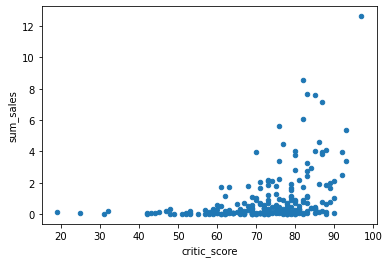

In [45]:
data_actual.query('platform == "PS4" and critic_score >= 0').plot(x='critic_score', y='sum_sales', kind='scatter')

In [46]:
data_actual.query('platform == "PS4" and critic_score >= 0')['critic_score'].corr(data_actual.query('platform == "PS4" and critic_score >= 0')['sum_sales'])

0.40266141068104083

Анализ диаграммы рассеяния и коэф. корреляции Пирсона привёл к выводу, что продажи игр немного зависят от оценки критиков: чем выше оценка, тем больше продажи.

<AxesSubplot:xlabel='user_score', ylabel='sum_sales'>

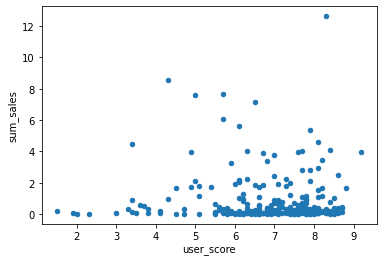

In [47]:
data_actual.query('platform == "PS4" and user_score >= 0').plot(x='user_score', y='sum_sales', kind='scatter')

In [48]:
data_actual.query('platform == "PS4" and user_score >= 0')['user_score'].corr(data_actual.query('platform == "PS4" and user_score >= 0')['sum_sales'])

-0.040131589472697356

Анализ диаграммы рассеяния и коэф. корреляции Пирсона привёл к выводу, что продажи игр так же не зависят от оценки игроков.

Проведя анализ зависимости продаж игр от оценок критиков и игроков, можно прити к следующему выводу: игроки чаще покупают игры, у которых выше оценка, причём высокой оценке критиков они доверяют больше, следовательно охотнее купят игру.

### Зависимость продаж игр от оценки критиков и игроков на платформах с 2014 года

Коэфициэнт корреляции Пирсона для платформы PS4 между продажами игр и оценкой критиков: 0.40266141068104083
Коэфициэнт корреляции Пирсона для платформы WiiU между продажами игр и оценкой критиков: 0.370201412480884
Коэфициэнт корреляции Пирсона для платформы XOne между продажами игр и оценкой критиков: 0.42867694370333226
Коэфициэнт корреляции Пирсона для платформы 3DS между продажами игр и оценкой критиков: 0.314117492869051
Коэфициэнт корреляции Пирсона для платформы PC между продажами игр и оценкой критиков: 0.17463413769350036
Коэфициэнт корреляции Пирсона для платформы X360 между продажами игр и оценкой критиков: 0.5257228356581523
Коэфициэнт корреляции Пирсона для платформы PS3 между продажами игр и оценкой критиков: 0.44657460493190704
Коэфициэнт корреляции Пирсона для платформы PSV между продажами игр и оценкой критиков: 0.04266490657009526


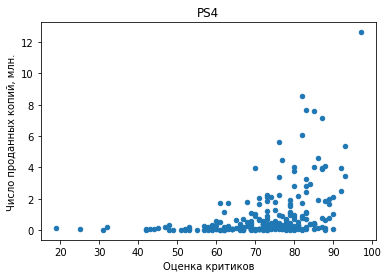

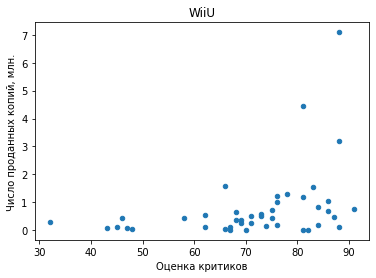

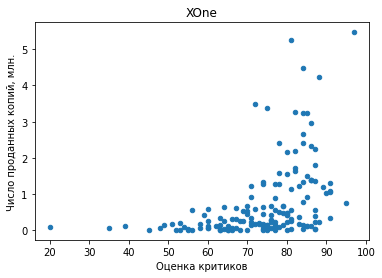

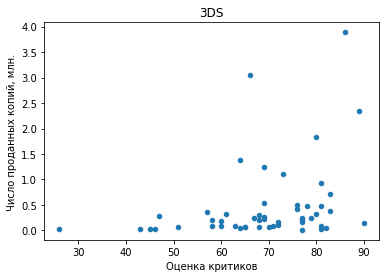

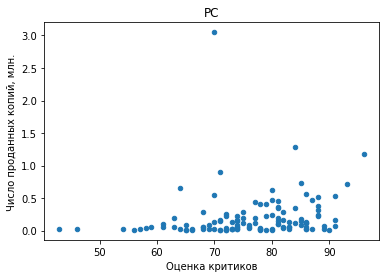

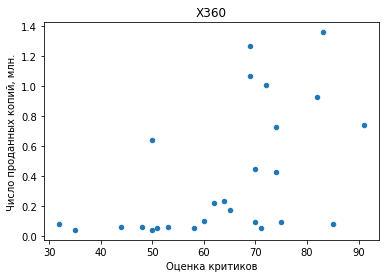

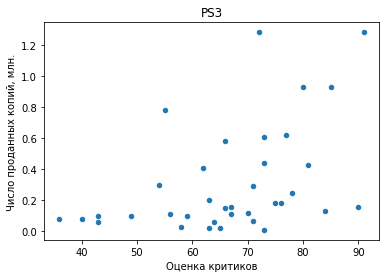

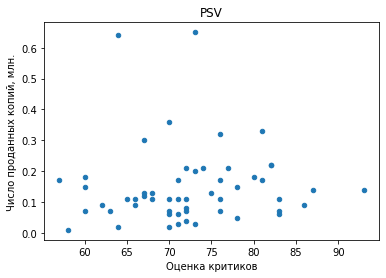

In [49]:
data_actual_critic_score = data_actual.query('critic_score >= 0')
data_actual_user_score = data_actual.query('user_score >= 0')

for platform in data_actual_critic_score['platform'].unique():
        data_actual_critic_score.query('platform == @platform').plot(x='critic_score', y='sum_sales', kind='scatter')
        plt.title(platform)
        plt.xlabel('Оценка критиков')
        plt.ylabel('Число проданных копий, млн.')
        print(f"Коэфициэнт корреляции Пирсона для платформы {platform} между продажами игр и оценкой критиков: {data_actual_critic_score.query('platform == @platform')['critic_score'].corr(data_actual_critic_score.query('platform == @platform')['sum_sales'])}")

Коэфициэнт корреляции Пирсона для платформы PS4 между продажами игр и оценкой игроков: -0.040131589472697356
Коэфициэнт корреляции Пирсона для платформы WiiU между продажами игр и оценкой игроков: 0.40792645792170773
Коэфициэнт корреляции Пирсона для платформы XOne между продажами игр и оценкой игроков: -0.0703839280647581
Коэфициэнт корреляции Пирсона для платформы PS3 между продажами игр и оценкой игроков: -0.16676141347662118
Коэфициэнт корреляции Пирсона для платформы X360 между продажами игр и оценкой игроков: -0.138444570945665
Коэфициэнт корреляции Пирсона для платформы 3DS между продажами игр и оценкой игроков: 0.2151932718527028
Коэфициэнт корреляции Пирсона для платформы PC между продажами игр и оценкой игроков: -0.07159665703472451
Коэфициэнт корреляции Пирсона для платформы Wii между продажами игр и оценкой игроков: 1.0
Коэфициэнт корреляции Пирсона для платформы PSV между продажами игр и оценкой игроков: -0.16845504978064446


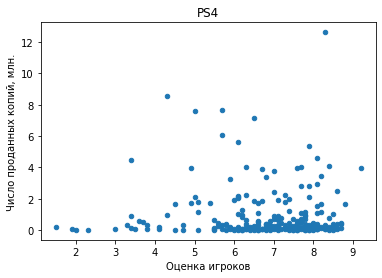

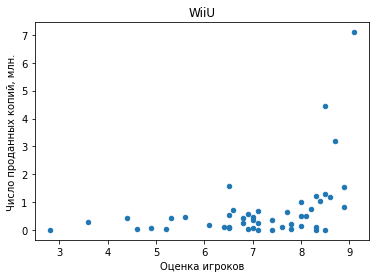

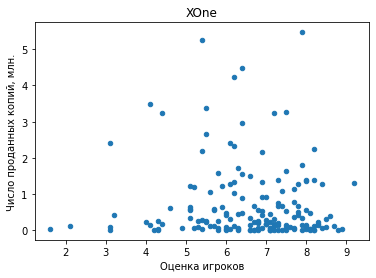

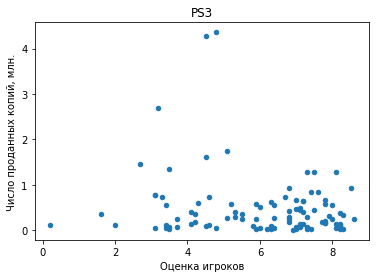

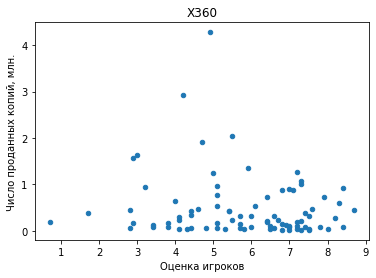

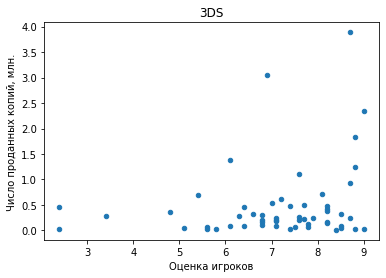

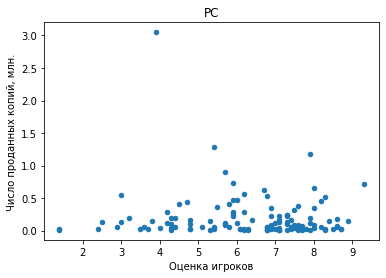

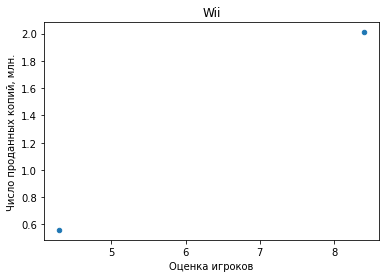

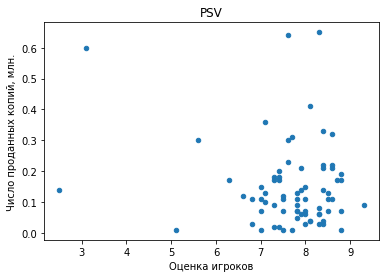

In [50]:
for platform in data_actual_user_score['platform'].unique():
        data_actual_user_score.query('platform == @platform').plot(x='user_score', y='sum_sales', kind='scatter')
        plt.title(platform)
        plt.xlabel('Оценка игроков')
        plt.ylabel('Число проданных копий, млн.')
        print(f"Коэфициэнт корреляции Пирсона для платформы {platform} между продажами игр и оценкой игроков: {data_actual_user_score.query('platform == @platform')['user_score'].corr(data_actual_user_score.query('platform == @platform')['sum_sales'])}")

Анализ диаграмм рассеяния и коэф. корреляции Пирсона между оценками и числом проданых копий для платформ c 2014 года:
* Игроки чаще покупают игру с высокой оценкой критиков независимо от платформы, только продажи для PC зависят слабее всех (кроме PSV: продажи не зависят от оценки критиков);
* Число покупок игры на платформах PS4, XOne, PS3, X360, 3DS, PC, PSV не зависит от оценки игроков. На WiiU есть явная зависимость от оценки игроков. На Wii коэф. корреляции Пирсона равен 1, что может говорить о явной зависимости продаж от оценки, но если посмотреть на график распределения, то можно увидеть, что игроками оценено лишь 2 игры: на этих данных нелльзя с точной уверенностью сказать, что продажи полностью зависят от оценки игроков

### Анализ популярности жанров игр 

In [51]:
data_platform_genre_profit = data_actual.pivot_table(index=['genre'], values='sum_sales', aggfunc=['sum', 'count'])
data_platform_genre_profit.columns = ['sum_sales', 'game_count']
data_platform_genre_profit = data_platform_genre_profit.reset_index()
data_platform_genre_profit['mean_profit_from_genre'] = data_platform_genre_profit['sum_sales'] / data_platform_genre_profit['game_count']
data_platform_genre_profit.sort_values(by='mean_profit_from_genre', ascending=False).head(5)

,genre,sum_sales,game_count,mean_profit_from_genre
8,Shooter,170.94,128,1.335469
10,Sports,109.48,161,0.680000
4,Platform,18.09,38,0.476053
2,Fighting,28.22,60,0.470333
7,Role-Playing,101.44,221,0.459005


In [52]:
data_platform_genre_profit_by_platform = data_actual.pivot_table(index=['platform', 'genre'], values='sum_sales', aggfunc=['sum', 'count'])
data_platform_genre_profit_by_platform.columns = ['sum_sales', 'game_count']
data_platform_genre_profit_by_platform = data_platform_genre_profit_by_platform.reset_index()
data_platform_genre_profit_by_platform['mean_profit_from_genre'] = data_platform_genre_profit_by_platform['sum_sales'] / data_platform_genre_profit_by_platform['game_count']

data_platform_genre_profit_by_platform.query('platform == "PS4"').sort_values(by='mean_profit_from_genre', ascending=False).head(5)

,platform,genre,sum_sales,game_count,mean_profit_from_genre
41,PS4,Shooter,78.46,38,2.064737
43,PS4,Sports,50.01,42,1.190714
33,PS4,Action,91.62,142,0.645211
37,PS4,Platform,5.42,9,0.602222
40,PS4,Role-Playing,28.99,51,0.568431


In [53]:
data_platform_genre_profit_by_platform.query('platform == "XOne"').sort_values(by='mean_profit_from_genre', ascending=False).head(5)

,platform,genre,sum_sales,game_count,mean_profit_from_genre
92,XOne,Shooter,55.39,36,1.538611
91,XOne,Role-Playing,10.55,14,0.753571
94,XOne,Sports,23.68,34,0.696471
87,XOne,Fighting,2.17,5,0.434000
88,XOne,Misc,6.74,17,0.396471


Самыми прибыльными играми с 2010 года стали игры жанра Shooter, Platform, Sports, Action, Misc.

Самыми продаваемыми играми на PS4 стали игры жанра 'Action', однако средняя прибыльность оказалась ниже, чем у жанров 'Shooter' и 'Sports'.
Самым популярным и самым прибыльным жанром на XOne оказался 'Shooter'.

Самые прибыльные жанры для PS4: Shooter, Sports, Action, Role-Playing, Fighting.
Самые прибыльные жанры для PS4: Shooter, Role-Playing, Sports, Racing, Action.

Среднюю прибыльность от жанра я рассчитывал как общее число проданных копий игр определённого жанра разделённое на число игр этого жанра.

<AxesSubplot:xlabel='genre', ylabel='sum_sales'>

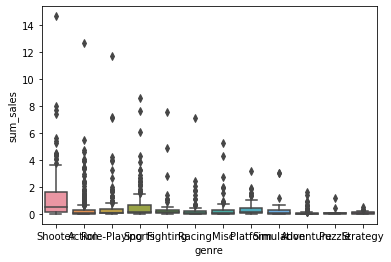

In [54]:
sns.boxplot(data=data_actual, x='genre', y='sum_sales')

(0.0, 4.0)

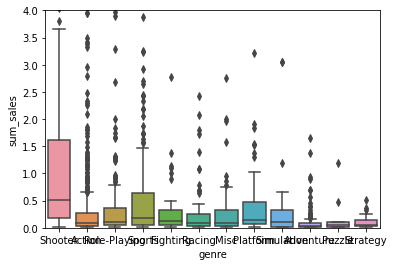

In [55]:
sns.boxplot(data=data_actual, x='genre', y='sum_sales')
plt.ylim(0, 4)

На диаграммах размаха видно, что самую высокую стабильную прибыльность обеспечивают шутеры.

## Составление портрета каждого пользователя региона

### 5 самых популярных платформ для каждого региона

In [56]:
data_actual_platform_region_sales = data_actual.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
data_actual_platform_region_sales['na_sales_share'] = round(data_actual_platform_region_sales['na_sales'] / data_actual_platform_region_sales['na_sales'].sum() * 100, 1)
data_actual_platform_region_sales['eu_sales_share'] = round(data_actual_platform_region_sales['eu_sales'] / data_actual_platform_region_sales['eu_sales'].sum() * 100, 1)
data_actual_platform_region_sales['jp_sales_share'] = round(data_actual_platform_region_sales['jp_sales'] / data_actual_platform_region_sales['jp_sales'].sum() * 100, 1)
data_actual_platform_region_sales

,eu_sales,jp_sales,na_sales,na_sales_share,eu_sales_share,jp_sales_share
platform,,,,,,
3DS,16.12,44.24,22.64,8.0,6.0,47.5
PC,17.97,0.00,7.23,2.5,6.6,0.0
PS3,25.54,11.22,22.05,7.8,9.4,12.1
PS4,130.04,15.02,98.61,34.7,48.0,16.1
PSP,0.00,0.36,0.00,0.0,0.0,0.4
PSV,3.53,14.54,2.52,0.9,1.3,15.6
Wii,2.59,0.00,2.08,0.7,1.0,0.0
WiiU,13.15,7.31,19.36,6.8,4.9,7.9
X360,15.49,0.08,28.30,10.0,5.7,0.1


Text(0.5, 1.0, 'Круговая диаграмма популярности платформ в японском регионе\n\n\n\n\n')

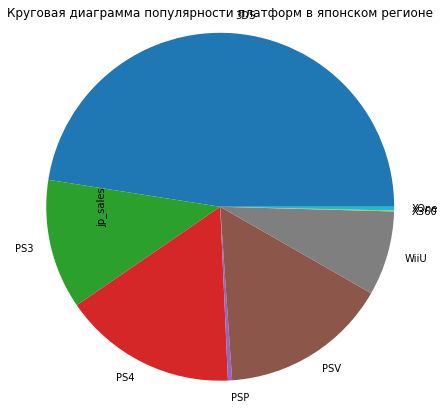

In [57]:
data_actual_platform_region_sales.plot(y='jp_sales', kind='pie', radius=2, legend=False)
plt.title("Круговая диаграмма популярности платформ в японском регионе" + 5*'\n')

In [58]:
data_actual_platform_region_sales['jp_sales_share'].sort_values(ascending=False).head(5)

platform
3DS     47.5
PS4     16.1
PSV     15.6
PS3     12.1
WiiU     7.9
Name: jp_sales_share, dtype: float64

Text(0.5, 1.0, 'Круговая диаграмма популярности платформ в европейском регионе\n\n\n\n\n\n')

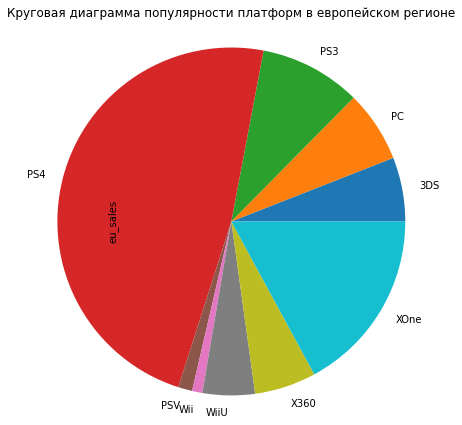

In [59]:
data_actual_platform_region_sales.plot(y='eu_sales', kind='pie', radius=2, legend=False)
plt.title("Круговая диаграмма популярности платформ в европейском регионе" + 6*'\n')

In [60]:
data_actual_platform_region_sales['eu_sales_share'].sort_values(ascending=False).head(5)

platform
PS4     48.0
XOne    17.1
PS3      9.4
PC       6.6
3DS      6.0
Name: eu_sales_share, dtype: float64

Text(0.5, 1.0, 'Круговая диаграмма популярности платформ в североамериканском регионе\n\n\n\n\n\n')

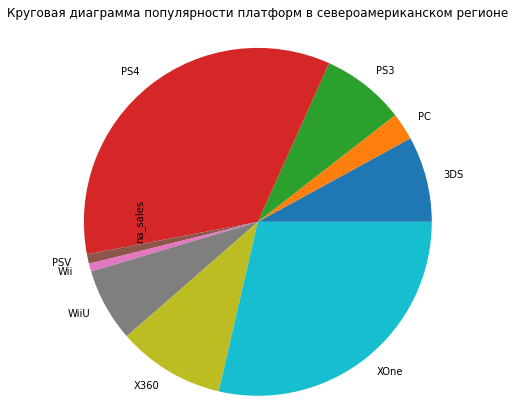

In [61]:
data_actual_platform_region_sales.plot(y='na_sales', kind='pie', radius=2, legend=False)
plt.title("Круговая диаграмма популярности платформ в североамериканском регионе" + 6*'\n')

In [62]:
data_actual_platform_region_sales['na_sales_share'].sort_values(ascending=False).head(5)

platform
PS4     34.7
XOne    28.6
X360    10.0
3DS      8.0
PS3      7.8
Name: na_sales_share, dtype: float64

### 5 самых популярных жанров для каждого региона

In [63]:
data_actual_genre_region_sales = data_actual.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
data_actual_genre_region_sales['na_sales_share'] = round(data_actual_genre_region_sales['na_sales'] / data_actual_genre_region_sales['na_sales'].sum() * 100, 1)
data_actual_genre_region_sales['eu_sales_share'] = round(data_actual_genre_region_sales['eu_sales'] / data_actual_genre_region_sales['eu_sales'].sum() * 100, 1)
data_actual_genre_region_sales['jp_sales_share'] = round(data_actual_genre_region_sales['jp_sales'] / data_actual_genre_region_sales['jp_sales'].sum() * 100, 1)
data_actual_genre_region_sales

,eu_sales,jp_sales,na_sales,na_sales_share,eu_sales_share,jp_sales_share
genre,,,,,,
Action,74.68,29.58,72.53,25.5,27.6,31.8
Adventure,6.49,3.60,5.64,2.0,2.4,3.9
Fighting,6.69,6.37,12.43,4.4,2.5,6.8
Misc,12.86,5.61,15.05,5.3,4.8,6.0
Platform,6.80,2.69,6.79,2.4,2.5,2.9
Puzzle,0.52,0.93,0.65,0.2,0.2,1.0
Racing,14.13,1.76,8.74,3.1,5.2,1.9
Role-Playing,28.17,31.16,33.47,11.8,10.4,33.5
Shooter,65.52,4.87,79.02,27.8,24.2,5.2


Text(0.5, 1.0, 'Круговая диаграмма популярности жанров в японском регионе\n\n\n\n\n\n')

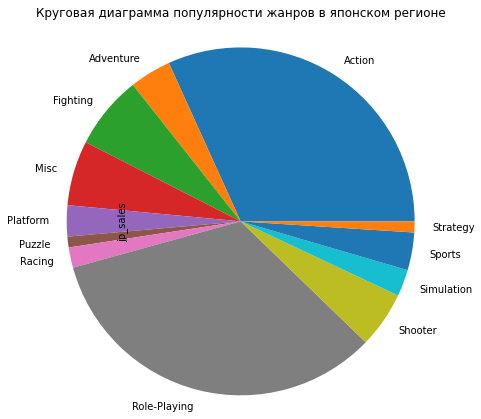

In [64]:
data_actual_genre_region_sales.plot(y='jp_sales', kind='pie', radius=2, legend=False)
plt.title("Круговая диаграмма популярности жанров в японском регионе" + 6*'\n')

In [65]:
data_actual_genre_region_sales['jp_sales_share'].sort_values(ascending=False).head(5)

genre
Role-Playing    33.5
Action          31.8
Fighting         6.8
Misc             6.0
Shooter          5.2
Name: jp_sales_share, dtype: float64

Text(0.5, 1.0, 'Круговая диаграмма популярности жанров в европейском регионе\n\n\n\n\n\n')

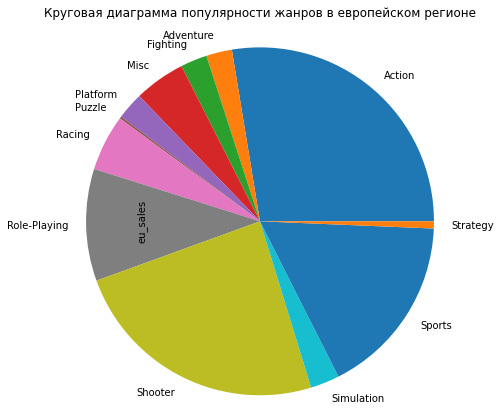

In [66]:
data_actual_genre_region_sales.plot(y='eu_sales', kind='pie', radius=2, legend=False)
plt.title("Круговая диаграмма популярности жанров в европейском регионе" + 6*'\n')

In [67]:
data_actual_genre_region_sales['eu_sales_share'].sort_values(ascending=False).head(5)

genre
Action          27.6
Shooter         24.2
Sports          16.9
Role-Playing    10.4
Racing           5.2
Name: eu_sales_share, dtype: float64

Text(0.5, 1.0, 'Круговая диаграмма популярности жанров в североамериканском регионе\n\n\n\n\n\n')

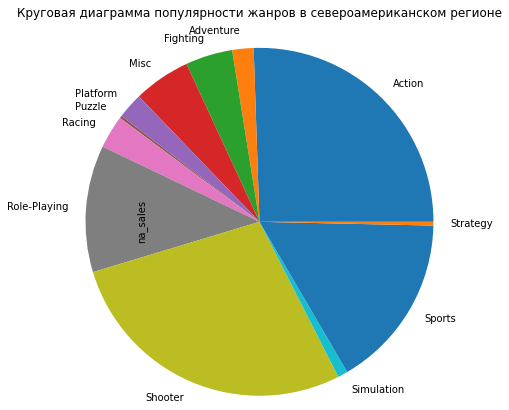

In [68]:
data_actual_genre_region_sales.plot(y='na_sales', kind='pie', radius=2, legend=False)
plt.title("Круговая диаграмма популярности жанров в североамериканском регионе" + 6*'\n')

In [69]:
data_actual_genre_region_sales['na_sales_share'].sort_values(ascending=False).head(5)

genre
Shooter         27.8
Action          25.5
Sports          16.2
Role-Playing    11.8
Misc             5.3
Name: na_sales_share, dtype: float64

### Влияние рейтинга ESRB на продажи регионах

,eu_sales
rating,
?,58.95
E,58.06
E10+,26.16
M,93.44
T,34.07


<AxesSubplot:ylabel='eu_sales'>

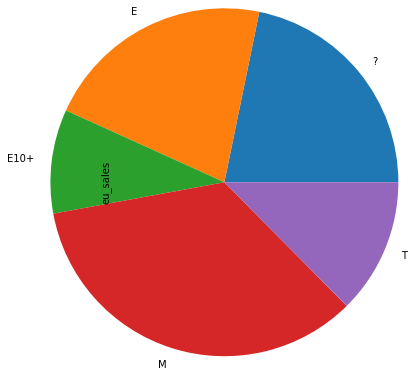

In [70]:
display(data_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum'))
data_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum').plot(y='eu_sales', kind='pie', radius=2, legend=False)

,na_sales
rating,
?,64.72
E,50.74
E10+,33.23
M,96.42
T,38.95


<AxesSubplot:ylabel='na_sales'>

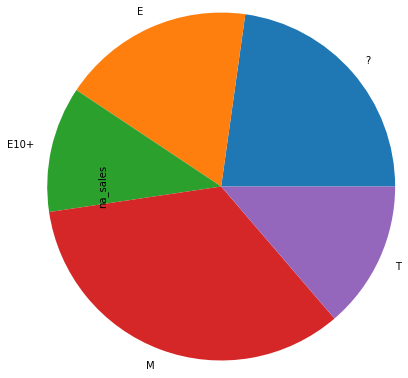

In [71]:
display(data_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum'))
data_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum').plot(y='na_sales', kind='pie', radius=2, legend=False)

,jp_sales
rating,
?,56.90
E,8.94
E10+,4.46
M,8.01
T,14.78


<AxesSubplot:ylabel='jp_sales'>

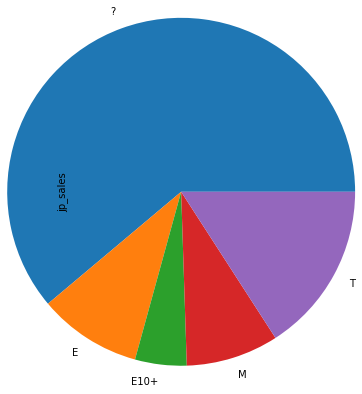

In [72]:
display(data_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum'))
data_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum').plot(y='jp_sales', kind='pie', radius=2, legend=False)

Чаще всего в европейском и североамериканском регионах отдают предпочтение играм с рейтингом M (17+), тогда как в японском отдают предпочтение играм с рейтингом Т (13+).

Рейтинг ESRB актуален для западного рынка, о чём говорит нам детальное сравнение регионов. В Японии больше всего покупают игры, не оценённые рейтингом ESRB, что может говорить о том, что в данном регионе предпочитают игры разработанные только для этого региона.

### Вывод

Самые популярные платформы:
* Японский регион: 3DS, PS3, WiiU, PS4, PSV;
* Европейский регион: PS3, PS4, 3DS, PC, XOne;
* Североамериканский регион: X360, PS3, PS4, XOne, 3DS.

Самые популяные жанры:
* Японский регион: Action, Role-Playing, Fighting, Misc, Shooter;
* Европейский регион: Action, Shooter, Sports, Role-Playing, Racing;
* Североамериканский регион: Action, Shooter, Sports, Role-Playing, Misc.

Различия разной популярности платформ в разных регионах обуславливается культурными особенностями: в Японии больше предпочитают платформы от японских компаний (PlayStation, Nintendo), тогда как в Европе и Северной Америке предпочитают платформы от американских компаний (Microsoft).

Предпочтения в жанрах в разных регионах незначительны.

Чаще всего в европейском и североамериканском регионах отдают предпочтение играм с рейтингом M (17+), тогда как в японском отдают предпочтение играм с рейтингом Т (13+). Рейтинг ESRB больше связан с западным рынком, в японском больше покупают игры, не оценённые данной системой.

## Проверка гипотез

### Проверка гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC

**H0**: Средний пользовательский рейтинг игр для Xbox One равен среднему пользовательскому рейтингу игр для PC

**H1**: Средний пользовательский рейтинг игр для Xbox One не равен среднему пользовательскому рейтингу игр для PC

In [73]:
# Создание двух выборок
xone_data = data_actual.query('platform == "XOne" and user_score >= 0').reset_index()
pc_data = data_actual.query('platform == "PC" and user_score >= 0').reset_index()

In [74]:
alpha = 0.05

results = st.ttest_ind(xone_data['user_score'], pc_data['user_score'], equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевую гипотезу отвергнуть не удалось')

p-значение: 0.11601398086668827
Нулевую гипотезу отвергнуть не удалось


**Вывод**:
Нулевая гипотеза прошла проверку, отвергнуть гипотезу о разности оценивания игр для PC и XOne в настоящее время пока нельзя.

### Проверка гипотезы о неравенстве средних пользовательских рейтингов жанров Action и Sports

**H0**: Средний пользовательский рейтинг игр для жанра Action равен среднему пользовательскому рейтингу игр жанра Sports

**H1**: Средний пользовательский рейтинг игр для жанра Action не равен среднему пользовательскому рейтингу игр жанра Sports

In [75]:
action_data = data_actual.query('genre == "Action" and user_score >= 0').reset_index()
sports_data = data_actual.query('genre == "Sports" and user_score >= 0').reset_index()

In [76]:
alpha = 0.05

results = st.ttest_ind(action_data['user_score'], sports_data['user_score'], equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевую гипотезу отвергнуть не удалось')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Вывод**:
Нулевая гипотеза не прошла проверку, следовательно в настоящее время игроки по разному оценивают игры жанров Action и Sports.

## Общий вывод

Проведя аналитическую работу я пришёл к следующим выводам:
1. Средняя продолжительность жизни платформы равна около 10 лет, причём на 5 год приходится пик продаж игр на данную платформу;
2. На данный момент есть 2 самые популярные и потенциально прибыльные платформы: Xbox One и PlayStation 4;
3. Самыми потенциально прибыльными жанрами игр являются шутеры, РПГ, спорт и экшены
4. Средний разброс проданных копий игр выше у PlayStation 4.
5. Число проданных игр выше, если игру высоко оценили критики. От оценки игроков продажи слабо зависят.
6. На японском рынке чаще покупают версии игр для платформ, разработанных японскими компаниями, на североамереканском рынке преобладают платформы американских компаний, а в европейском регионе поуляры платформы как американских, так и японских компаний.
7. Популярность жанров игр не зависит от региона.

Исходя из фактов выше, можно предположить, что в будущем максимальную прибыль в японском регионе принесут игры для PS4, а в североамериканском игры для Xbox One. Причём, чтобы максимзировать прибыль необходимо продавать игры жанров Shooter, Role-Playing, Sports, Action высоко оценённые критиками.